In this notebook there are some plots and visualizations of the metrics of the models trained.

First plots, are the train and validation loss metric of the trained models.

In [2]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt
import os 

In [ ]:
# Get the models logs path
log_dir_1windows = "tft_results_logs/TFM_model_1windows/version_0/"
log_dir_2windows = "tft_results_logs/TFM_model_2windows/version_0/"
log_dir_3windows = "tft_results_logs/TFM_model_3windows/version_2/"
log_dir_4windows = "tft_results_logs/TFM_model_4windows/version_0/"

# Read the event logs
event_file_1windows = [f for f in os.listdir(log_dir_1windows) if f.startswith("events.out")][0]
event_file_2windows = [f for f in os.listdir(log_dir_2windows) if f.startswith("events.out")][0]
event_file_3windows = [f for f in os.listdir(log_dir_3windows) if f.startswith("events.out")][0]
event_file_4windows = [f for f in os.listdir(log_dir_4windows) if f.startswith("events.out")][0]
event_path_1windows = os.path.join(log_dir_1windows, event_file_1windows)
event_path_2windows = os.path.join(log_dir_2windows, event_file_2windows)
event_path_3windows = os.path.join(log_dir_3windows, event_file_3windows)
event_path_4windows = os.path.join(log_dir_4windows, event_file_4windows)

# Create the event accumulator of tensorboard
ea_1windows = EventAccumulator(event_path_1windows)
ea_1windows.Reload()
ea_2windows = EventAccumulator(event_path_2windows)
ea_2windows.Reload()
ea_3windows = EventAccumulator(event_path_3windows)
ea_3windows.Reload()
ea_4windows = EventAccumulator(event_path_4windows)
ea_4windows.Reload()

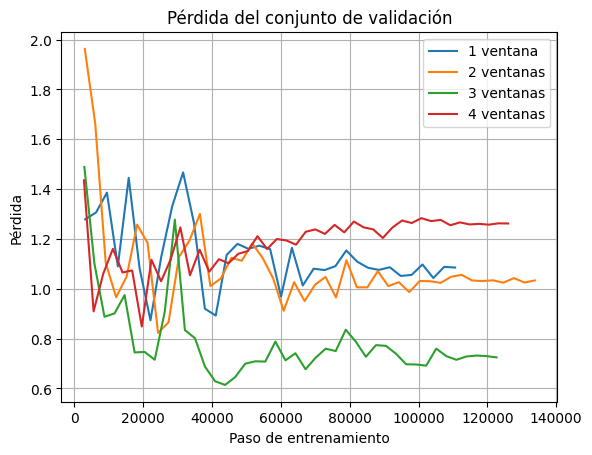

In [ ]:
# Get the Val loss metric
val_loss_events_1win = ea_1windows.Scalars("val_loss")
val_loss_events_2win = ea_2windows.Scalars("val_loss")
val_loss_events_3win = ea_3windows.Scalars("val_loss")
val_loss_events_4win = ea_4windows.Scalars("val_loss")

# Extract the values
val_epochs_1win = [e.step for e in val_loss_events_1win]
val_values_1win = [e.value for e in val_loss_events_1win]
val_epochs_2win = [e.step for e in val_loss_events_2win]
val_values_2win = [e.value for e in val_loss_events_2win]
val_epochs_3win = [e.step for e in val_loss_events_3win]
val_values_3win = [e.value for e in val_loss_events_3win]
val_epochs_4win = [e.step for e in val_loss_events_4win]
val_values_4win = [e.value for e in val_loss_events_4win]

# Plot the metrics
plt.plot(val_epochs_1win, val_values_1win, label="1 ventana")
plt.plot(val_epochs_2win, val_values_2win, label="2 ventanas")
plt.plot(val_epochs_3win, val_values_3win, label="3 ventanas")
plt.plot(val_epochs_4win, val_values_4win, label="4 ventanas")
plt.xlabel("Paso de entrenamiento")
plt.ylabel("Pérdida")
plt.title("Pérdida del conjunto de validación")
plt.legend()
plt.grid(True)
plt.show()

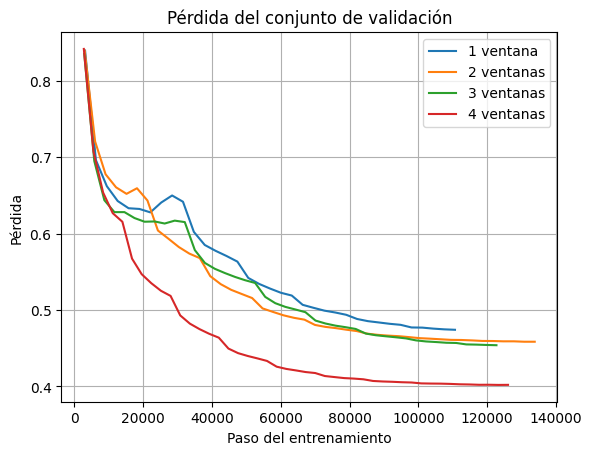

In [ ]:
# Extract the train loss 
train_loss_events_1win = ea_1windows.Scalars("train_loss_epoch")
train_loss_events_2win = ea_2windows.Scalars("train_loss_epoch")
train_loss_events_3win = ea_3windows.Scalars("train_loss_epoch")
train_loss_events_4win = ea_4windows.Scalars("train_loss_epoch")

# Get the values
train_epochs_1win = [e.step for e in train_loss_events_1win]
train_values_1win = [e.value for e in train_loss_events_1win]
train_epochs_2win = [e.step for e in train_loss_events_2win]
train_values_2win = [e.value for e in train_loss_events_2win]
train_epochs_3win = [e.step for e in train_loss_events_3win]
train_values_3win = [e.value for e in train_loss_events_3win]
train_epochs_4win = [e.step for e in train_loss_events_4win]
train_values_4win = [e.value for e in train_loss_events_4win]

# Plot the train loss
plt.plot(train_epochs_1win, train_values_1win, label="1 ventana")
plt.plot(train_epochs_2win, train_values_2win, label="2 ventanas")
plt.plot(train_epochs_3win, train_values_3win, label="3 ventanas")
plt.plot(train_epochs_4win, train_values_4win, label="4 ventanas")
plt.xlabel("Paso del entrenamiento")
plt.ylabel("Pérdida")
plt.title("Pérdida del conjunto de validación")
plt.legend()
plt.grid(True)
plt.show()

Next plot is the complete time series.

In [ ]:
# Read the dataframe
import pandas as pd
df = pd.read_csv("tft_predictions_murcia_dataframe.csv", parse_dates=["time"])

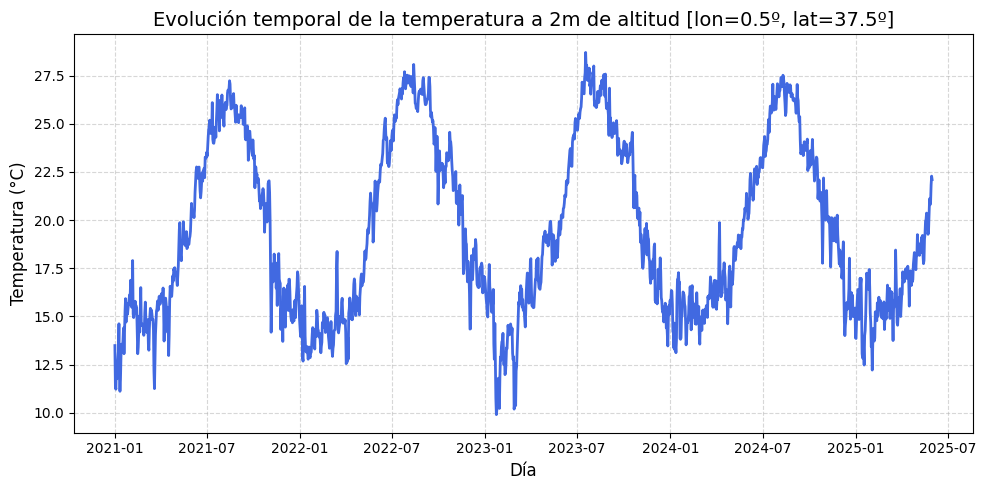

In [ ]:
import matplotlib.pyplot as plt

# Make the plot
plt.figure(figsize=(10, 5))
plt.plot(df["time"],df["2t"], color='royalblue', linewidth=2)

plt.title("Evolución temporal de la temperatura a 2m de altitud [lon=0.5º, lat=37.5º]", fontsize=14)
plt.xlabel("Día", fontsize=12)
plt.ylabel("Temperatura (°C)", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


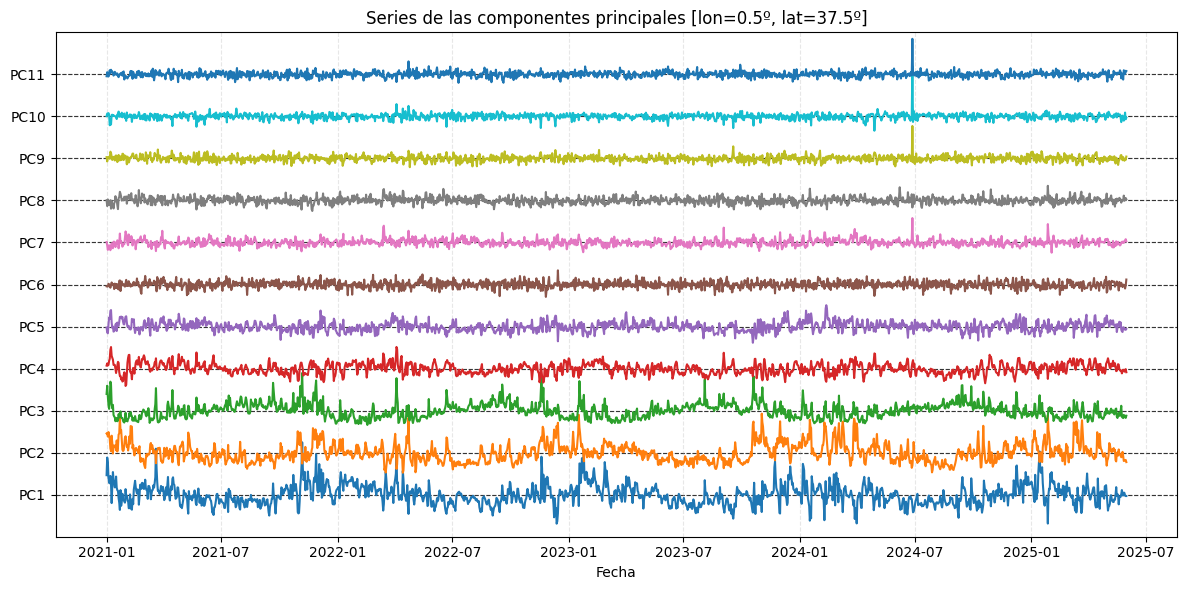

In [ ]:
# Plot the different PCs
plt.figure(figsize=(12, 6))
offset = 15  # Vertical space between series

# Use the PC columns
series = [col for col in ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11"]]

# Plot all the series
for i, col in enumerate(series):
    plt.plot(df["time"], df[col] + i * offset, label=col, zorder = 3)  # vertical displacement
    plt.axhline(y=i * offset, color='black', linewidth=0.8, linestyle='--', zorder = 1)

plt.title("Series de las componentes principales [lon=0.5º, lat=37.5º]")
plt.xlabel("Fecha")
yticks = [i * offset for i in range(len(series))]
yticklabels = [f"{col}" for col in series]
plt.yticks(yticks, yticklabels)
plt.ylim(-offset, (len(series)) * offset)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()